In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Importing data
df=pd.read_excel("Sales_Analysis.xlsx")

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [10]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [11]:
# Checking Postal Code Column as it is having many null values
df["Postal Code"]

0        10024.0
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
51285        NaN
51286    77095.0
51287    93030.0
51288        NaN
51289        NaN
Name: Postal Code, Length: 51290, dtype: float64

In [12]:
df.shape

(51290, 24)

In [13]:
# Dropping Postal Code column as it is having many null values so it will not be useful in EDA
df.drop(['Postal Code'],axis=1,inplace=True)

In [14]:
df.shape

(51290, 23)

In [15]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [16]:
# Exploring Segment Column
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

<AxesSubplot:xlabel='Segment', ylabel='count'>

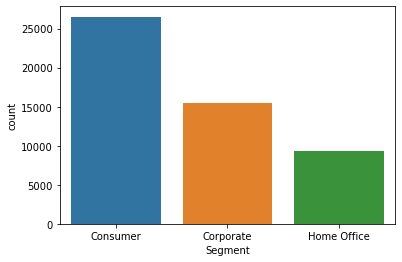

In [17]:
sns.countplot(x="Segment",data=df)

In [18]:
# Now take a look which segment has provided more Profit
seg_sales=df.groupby(["Segment"],as_index=True)["Profit"].sum()

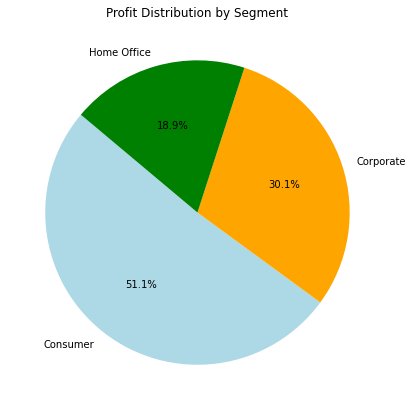

In [19]:
# Plotting in Pie chart
plt.figure(figsize=(10,7))
color=['LightBlue',"Orange","Green"]
plt.pie(seg_sales,labels=seg_sales.index, autopct='%1.1f%%', colors=color, startangle=140)
plt.title('Profit Distribution by Segment')
plt.show()

In [20]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [21]:
# Analysing City Columns
df["City"].unique()

array(['New York City', 'Wollongong', 'Brisbane', ..., 'Abilene',
       'Felahiye', 'Victoria Falls'], dtype=object)

<AxesSubplot:xlabel='City', ylabel='count'>

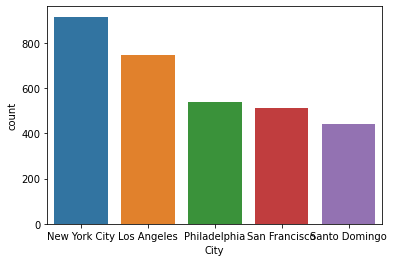

In [22]:
city_counts =df['City'].value_counts().head(5)
sns.countplot(x="City",data=df,order=city_counts.index)

In [23]:
# Cities which provided maximum Average Sales
city_sales=df.groupby(["City"],as_index=True)["Profit"].sum()
city_sales_sorted=city_sales.sort_values(ascending=False).head(5)

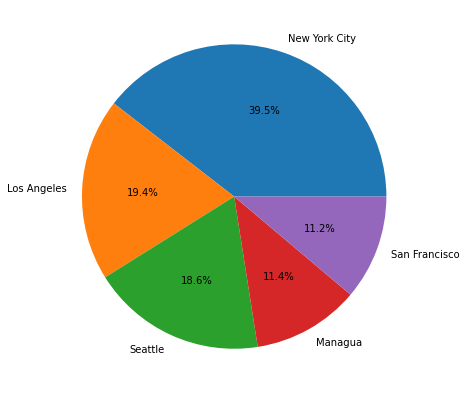

In [24]:
plt.figure(figsize=(7,7))
plt.pie(city_sales_sorted,labels=city_sales_sorted.index,autopct='%1.1f%%')
plt.show()

In [25]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

<AxesSubplot:xlabel='Country', ylabel='count'>

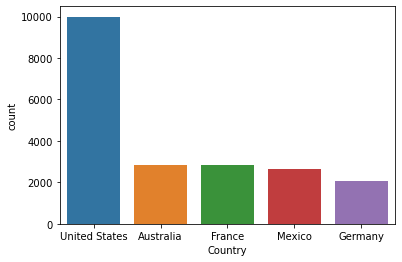

In [26]:
# Analysing Country Column
country_count=df["Country"].value_counts().head(5)
sns.countplot(x="Country",data=df,order=country_count.index)

In [27]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [28]:
# Analysing Market Column
df["Market"].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

<AxesSubplot:xlabel='Market', ylabel='count'>

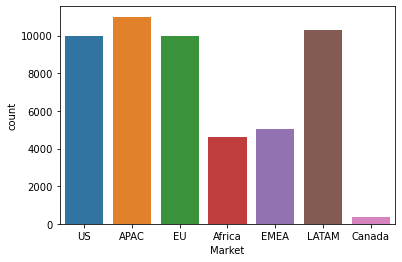

In [29]:
sns.countplot(x="Market",data=df)

In [30]:
markets_sales=df.groupby(["Market"],as_index=True)["Sales"].mean()
markets_sales

Market
APAC      325.917481
Africa    170.868370
Canada    174.292109
EMEA      160.302508
EU        293.808906
LATAM     210.278334
US        229.858001
Name: Sales, dtype: float64

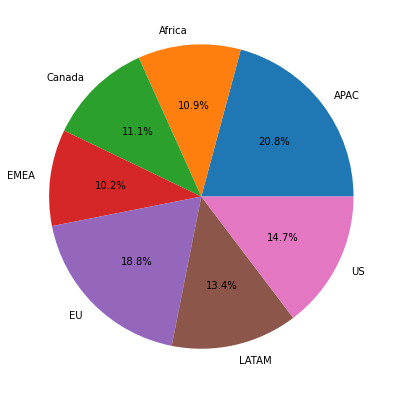

In [31]:
plt.figure(figsize=(7,7))
plt.pie(markets_sales,labels=markets_sales.index,autopct='%1.1f%%')
plt.show()

In [32]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [33]:
# Analysing Region column
df["Region"].unique()

array(['East', 'Oceania', 'Central', 'Africa', 'West', 'South',
       'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean',
       'Southeast Asia', 'Canada'], dtype=object)

<AxesSubplot:xlabel='Region', ylabel='count'>

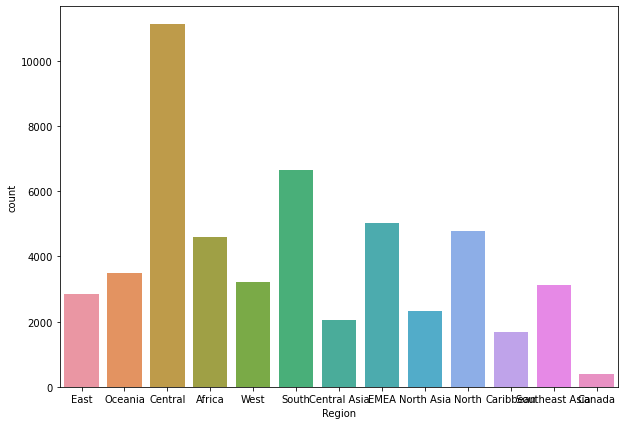

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(x="Region",data=df)

From above graph we can conclude that Central Region has purchase more

In [35]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [36]:
# Analysing Category column
df['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

<AxesSubplot:xlabel='Category', ylabel='count'>

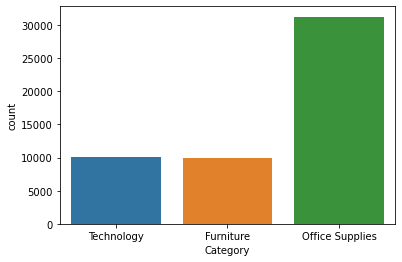

In [37]:
sns.countplot(x="Category",data=df)

In [38]:
# Analysing mean sales based on category
cat_sales=df.groupby(["Category"],as_index=True)["Sales"].mean()

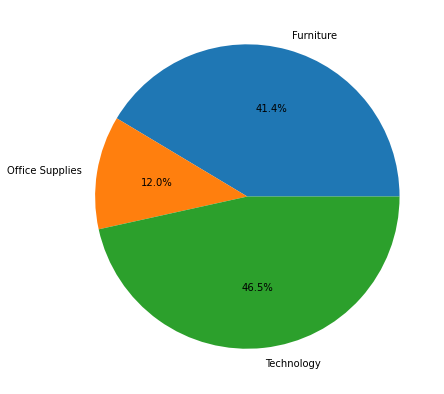

In [39]:
plt.figure(figsize=(7,7))
plt.pie(cat_sales,labels=cat_sales.index,autopct='%1.1f%%')
plt.show()

In [40]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [41]:
df["Sub-Category"].unique()

array(['Accessories', 'Chairs', 'Phones', 'Copiers', 'Tables', 'Binders',
       'Supplies', 'Appliances', 'Machines', 'Bookcases', 'Storage',
       'Furnishings', 'Art', 'Paper', 'Envelopes', 'Fasteners', 'Labels'],
      dtype=object)

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

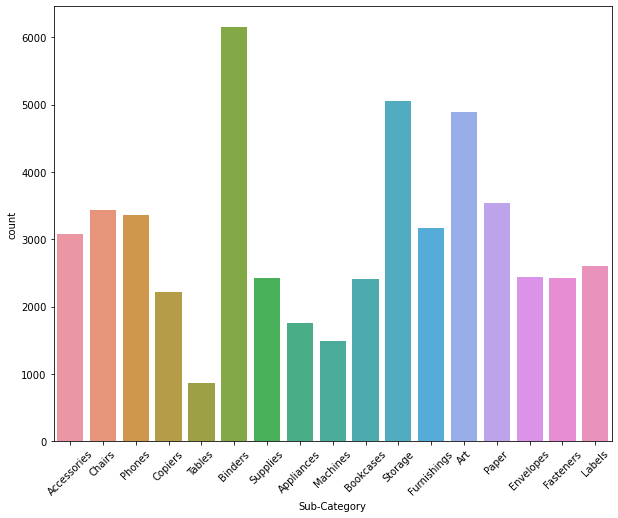

In [42]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.countplot(x="Sub-Category",data=df)

In [43]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [44]:
# Analysing Ship Mode Column
df["Ship Mode"].unique()

array(['Same Day', 'Second Class', 'First Class', 'Standard Class'],
      dtype=object)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

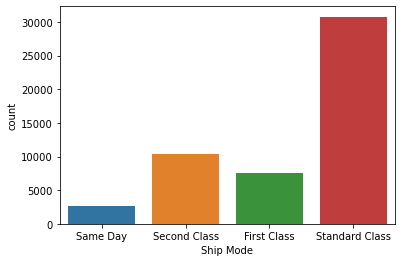

In [45]:
sns.countplot(x="Ship Mode",data=df)

In [46]:
# Sales Trends over Time
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [47]:
df["Order Date"]

0       2012-07-31
1       2013-02-05
2       2013-10-17
3       2013-01-28
4       2013-11-05
           ...    
51285   2014-06-19
51286   2014-06-20
51287   2013-12-02
51288   2012-02-18
51289   2012-05-22
Name: Order Date, Length: 51290, dtype: datetime64[ns]

In [48]:
df["Year"]=pd.to_datetime(df["Order Date"]).dt.year

In [49]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Year'],
      dtype='object')

In [50]:
df["Year"]

0        2012
1        2013
2        2013
3        2013
4        2013
         ... 
51285    2014
51286    2014
51287    2013
51288    2012
51289    2012
Name: Year, Length: 51290, dtype: int64

In [52]:
df["Year"].unique()

array([2012, 2013, 2011, 2014], dtype=int64)

([<matplotlib.axis.XTick at 0x25ebb624a00>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

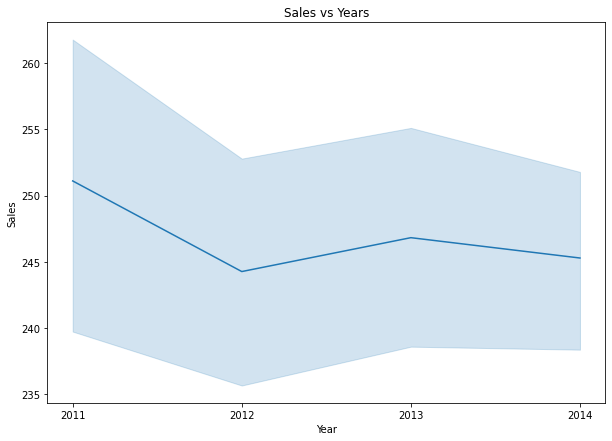

In [66]:
plt.figure(figsize=(10,7))
sns.lineplot(x="Year",y="Sales",data=df)
plt.title("Sales vs Years")
plt.xticks(df['Year'].unique())

([<matplotlib.axis.XTick at 0x25ebb7dda30>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

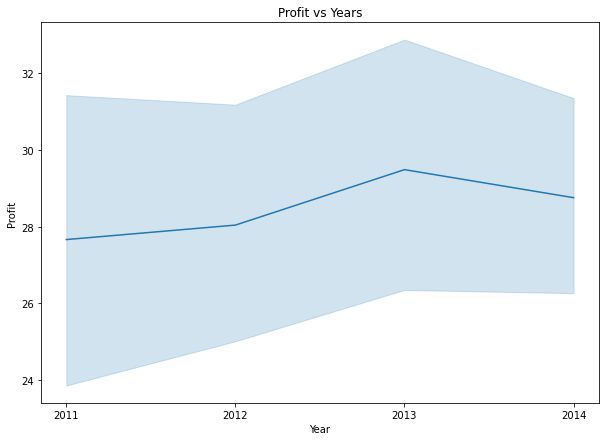

In [68]:
plt.figure(figsize=(10,7))
sns.lineplot(x="Year",y="Profit",data=df)
plt.title("Profit vs Years")
plt.xticks(df['Year'].unique())